In [11]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [21]:
output_dir = '/mnt/data/fai_kp_coco'
image_set = 'train'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [29]:
dir(coco)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [55]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)

dbe6200473f39234be48cf478218bfc0
{'height': 512, 'width': 512, 'file_name': 'dbe6200473f39234be48cf478218bfc0.jpg', 'id': 'dbe6200473f39234be48cf478218bfc0', 'category': 'blouse'}


In [56]:
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id

/mnt/data/fai_kp_coco/images/blouse/dbe6200473f39234be48cf478218bfc0.jpg


'dbe6200473f39234be48cf478218bfc0'

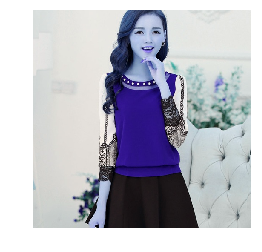

In [57]:
img = cv2.imread(img_path.as_posix())
plt.axis('off')
plt.imshow(img)
plt.show()

In [58]:
# catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# catIds=coco.getCatIds()
catNms=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catNms.append(ann['category_id'])
print(catNms)

[1]


[{'segmentation': [], 'bbox': [153, 144, 202, 262], 'keypoints': [209, 144, 1, 313, 146, 2, 256, 168, 2, 162, 153, 2, 355, 157, 2, 192, 243, 1, 322, 243, 1, -1, -1, 0, -1, -1, 0, 183, 406, 2, 153, 402, 2, 300, 210, 2, 325, 200, 2, 191, 381, 2, 347, 380, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'iscrowd': 0, 'image_id': 'dbe6200473f39234be48cf478218bfc0', 'category_id': 1, 'id': 'f4e189c00d0613de'}]


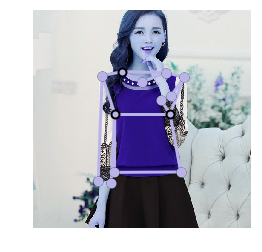

In [59]:
plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

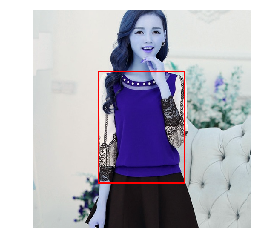

In [60]:
xmin, ymin, width, height = anns[0]['bbox']
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()